# DATA SCIENTIST CHALLENGE - CESAR CHARRIA


## Metodología de trabajo

Se hará uso de la metodología CRISP- para el desarrollo del presente challenge

## Cargue de librerías

In [1]:
import os
from cmath import inf

# Manipulacion de datos
import pandas as pd
import numpy as np

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
import collections
from pprint import pprint
%matplotlib inline

# # Train y validation set
from sklearn.model_selection import train_test_split

# CV
from sklearn.model_selection import GridSearchCV

# Metricas
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score

# Pipelines
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbPipeline


# Preprocesamiento
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer, make_column_selector

# Imputacion
from sklearn.impute import KNNImputer, SimpleImputer

# Modelamiento
from sklearn.discriminant_analysis import LinearClassifierMixin, LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
import statsmodels.api as sm

#Optimización Hiperparametros
from bayes_opt import BayesianOptimization
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events
from sklearn.model_selection import KFold

## 1. Cargue de los datos

In [3]:
df = pd.read_csv('DS_Challenge.csv', sep=";")

print (df.head(5))

   ID_USER genero        monto       fecha  dia_numero dia_semana  hora  \
0        0      F  608,3456335  21/01/2020          21     Martes    20   
1        0      F  88,71924289  15/01/2020          15  Miércoles     7   
2        1      F  790,0376533  17/01/2020          17    Viernes    11   
3        1      F  767,0053873   5/01/2020           5    Domingo    11   
4        1      F  254,1710526  30/01/2020          30     Jueves    10   

                                         dispositivo establecimiento  \
0  {'model': 2020; 'device_score': 3; 'os': 'ANDR...           Super   
1  {'model': 2020; 'device_score': 1; 'os': 'ANDR...             NaN   
2      {'model': 2020; 'device_score': 1; 'os': ','}             NaN   
3    {'model': 2020; 'device_score': 3; 'os': 'WEB'}           MPago   
4     {'model': 2020; 'device_score': 3; 'os': '%%'}             NaN   

        ciudad  tipo_tc  linea_tc  interes_tc  status_txn  is_prime  \
0       Merida  FÃ­sica     71000          51

# 2. Entendimiento y preparación de los datos

En esta sección se llevarán a cabo algunas actividades iniciales de entendimiento de los datos, como por ejemplo conocer la cantidad de registros, de variables, los tipos de variables, la cantidad de registros faltantes y de acuerdo a los hallazgos se aplicará la limpieza y ajuste que corresponda para así contar un un dataset idóneo que permita realizar el análisis Exploratorio de los Datos adecuado y encontrar los hallazgos correctos previo a un fase de modelamiento de los datos.

## 2.1 Entendimiento inicial

Se cuenta con un dataset de 18 variables y 26.975 registros. La variable objetivo "fraude". Algunos de los tipos de variables serán ajustados en la preparación de los datos

In [4]:
print(df.shape)

(26975, 18)


In [5]:
df.dtypes

ID_USER             int64
genero             object
monto              object
fecha              object
dia_numero          int64
dia_semana         object
hora                int64
dispositivo        object
establecimiento    object
ciudad             object
tipo_tc            object
linea_tc            int64
interes_tc          int64
status_txn         object
is_prime             bool
dcto               object
cashback           object
fraude               bool
dtype: object

## 2.2 Datos faltantes

Al realizar un análisis de datos faltantes se encuentra que las variables "establecimiento" y "ciudad" presentan 10.119 y 11.678 registros faltantes respectivamente. En algunos casos los faltantes aparecen como NA, N/A o nulos.

In [6]:
df.isna().sum()

ID_USER                0
genero                 0
monto                  0
fecha                  0
dia_numero             0
dia_semana             0
hora                   0
dispositivo            0
establecimiento    10119
ciudad             11678
tipo_tc                0
linea_tc               0
interes_tc             0
status_txn             0
is_prime               0
dcto                   0
cashback               0
fraude                 0
dtype: int64

In [7]:
df.isna().sum() / len(df) * 100

ID_USER             0.000000
genero              0.000000
monto               0.000000
fecha               0.000000
dia_numero          0.000000
dia_semana          0.000000
hora                0.000000
dispositivo         0.000000
establecimiento    37.512512
ciudad             43.291937
tipo_tc             0.000000
linea_tc            0.000000
interes_tc          0.000000
status_txn          0.000000
is_prime            0.000000
dcto                0.000000
cashback            0.000000
fraude              0.000000
dtype: float64

## 2.3 Limpieza inicial y preparación

Se realiza ajustes tales como reemplazar los faltantes por alguna categoría, cambiar el tipo de datos y limpiar variables.

### Variable Genero

Se reemplaza "--" por otro, esto dado que es posible que no sea obligatorio poner un genero, sin significar que se deban perder estos registros.

In [8]:
df.genero.value_counts()

M     13519
F     10726
--     2730
Name: genero, dtype: int64

In [9]:
df['genero'] = np.where(df['genero']== '--', "Otro", df.genero)

In [10]:
df.genero.value_counts()

M       13519
F       10726
Otro     2730
Name: genero, dtype: int64

### Variable Establecimiento

Esta variable presenta un total de 10.119 registros sin dato, por lo cual se decide reemplazarlos por la categoria "Otro" para no perder estos datos, puesto que representan una cantidad importante del total de registros.

In [11]:
df.isna().establecimiento.value_counts()

False    16856
True     10119
Name: establecimiento, dtype: int64

In [12]:
df['establecimiento'] = np.where(df.isna().establecimiento, "Otro", df.establecimiento)

In [13]:
df.establecimiento.value_counts()

Otro           10119
Restaurante     3454
Abarrotes       3415
Super           3402
MPago           3343
Farmacia        3242
Name: establecimiento, dtype: int64

### Variable Ciudad

Esta variable presenta un total de 11.678 registros sin dato, por lo cual se decide reemplazarlos por la categoria "Otro" para no perder estos datos, puesto que representan una cantidad importante del total de registros.

In [14]:
df.isna().ciudad.value_counts()

False    15297
True     11678
Name: ciudad, dtype: int64

In [15]:
df['ciudad'] = np.where(df.isna().ciudad, "Otro", df.ciudad)

In [16]:
df.ciudad.value_counts()

Otro           11678
Toluca          3997
Guadalajara     3833
Merida          3761
Monterrey       3706
Name: ciudad, dtype: int64

### Variable Tipo_tc

Para tener mayor limpieza y claridad en los datos, en esta variable se ajusta la categoría "FÃ­sica" a "Fisica".

In [17]:
df.tipo_tc.value_counts()

FÃ­sica    18903
Virtual     8072
Name: tipo_tc, dtype: int64

In [18]:
df['tipo_tc'] = np.where(df['tipo_tc']== 'FÃ­sica', "Fisica", df.tipo_tc)

In [19]:
df.tipo_tc.value_counts()

Fisica     18903
Virtual     8072
Name: tipo_tc, dtype: int64

### Cambio en el tipo de variables

Para algunas variables se realiza el cambio de su tipo para realizar un análisis correcto de estas.

In [20]:
#Tipos iniciales
df.dtypes

ID_USER             int64
genero             object
monto              object
fecha              object
dia_numero          int64
dia_semana         object
hora                int64
dispositivo        object
establecimiento    object
ciudad             object
tipo_tc            object
linea_tc            int64
interes_tc          int64
status_txn         object
is_prime             bool
dcto               object
cashback           object
fraude               bool
dtype: object

In [21]:
df['monto'] = df['monto'].str.replace(",", ".")
df['dcto'] = df['dcto'].str.replace(",", ".")
df['cashback'] = df['cashback'].str.replace(",", ".")

In [22]:
df = df.astype({'monto': 'float64', 'is_prime': 'object', 'dia_numero': 'object', 'linea_tc': 'float64',
                'interes_tc': 'float64','dcto': 'float64', 'cashback': 'float64','fraude': 'object'})

In [23]:
#Tipos ajustados
df.dtypes

ID_USER              int64
genero              object
monto              float64
fecha               object
dia_numero          object
dia_semana          object
hora                 int64
dispositivo         object
establecimiento     object
ciudad              object
tipo_tc             object
linea_tc           float64
interes_tc         float64
status_txn          object
is_prime            object
dcto               float64
cashback           float64
fraude              object
dtype: object

## 2.4 Análisis Exploratorio de Datos (EDA)

Con los ajustes realizados previamente se procede a realizar el EDA, donde se analizarán las variables de manera univariada, bivariada y multivariada. Dado que en esta sección también se crearán algunas variables, se hará uso de una copia de dataframe que se ha consolidado hasta el punto anterior, el cual se denominara df1.

In [24]:
df1= df

### 2.4.1 Análisis descriptivo general de todas las variables

Se inicia con un panorama general de todas las variables(aún no se excluye ninguna), donde se pueden observar algunos de los estadístico descriptivos más importantes.

In [25]:
df1.describe(include="all")

,ID_USER,genero,monto,fecha,dia_numero,dia_semana,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
count,26975.000000,26975,26975.000000,26975,26975.0,26975,26975.000000,26975,26975,26975,26975,26975.000000,26975.000000,26975,26975,26975.000000,26975.000000,26975
unique,NaN,3,NaN,29,29.0,7,NaN,20,6,5,2,NaN,NaN,3,2,NaN,NaN,2
top,NaN,M,NaN,29/01/2020,29.0,Jueves,NaN,{'model': 2020; 'device_score': 4; 'os': '%%'},Otro,Otro,Fisica,NaN,NaN,Aceptada,False,NaN,NaN,False
freq,NaN,13519,NaN,977,977.0,4613,NaN,1411,10119,11678,18903,NaN,NaN,18844,23416,NaN,NaN,26165
mean,2003.765412,NaN,499.069493,NaN,NaN,NaN,11.987618,NaN,NaN,NaN,NaN,62476.811863,48.224875,NaN,NaN,17.466134,6.261186,NaN
std,1144.630736,NaN,289.309518,NaN,NaN,NaN,6.642565,NaN,NaN,NaN,NaN,21886.892902,9.587256,NaN,NaN,34.334566,4.458440,NaN
min,0.000000,NaN,0.017303,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,25000.000000,32.000000,NaN,NaN,0.000000,0.000138,NaN
25%,1041.000000,NaN,246.521227,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,44000.000000,40.000000,NaN,NaN,0.000000,2.791740,NaN
50%,2006.000000,NaN,500.501022,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,62000.000000,48.000000,NaN,NaN,0.000000,5.636711,NaN
75%,2973.500000,NaN,749.598192,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,82000.000000,57.000000,NaN,NaN,18.770710,8.531604,NaN


### 2.4.2 Análisis univariado variables categóricas

Se realiza un análisis univariado por separado de las variables tanto categórica como numéricas.

In [26]:
# Variables categóricas:
df1.select_dtypes(include='object').columns

Index(['genero', 'fecha', 'dia_numero', 'dia_semana', 'dispositivo',
       'establecimiento', 'ciudad', 'tipo_tc', 'status_txn', 'is_prime',
       'fraude'],
      dtype='object')

### Distribución de la variable objetivo "fraude"

Se realiza un análisis de la variable "fraude" y se observa que del total de registros 810 son fraude y 26.156 no lo son, lo que inicialmente da un indicio claro que el dataset se encuentra desbalanceado.

In [27]:
df1.fraude.value_counts()

False    26165
True       810
Name: fraude, dtype: int64

In [28]:
df1.fraude.value_counts() / len(df1) * 100

False    96.99722
True      3.00278
Name: fraude, dtype: float64

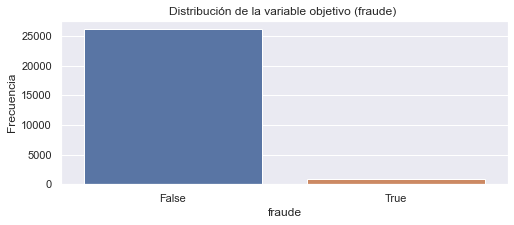

In [30]:
sns.countplot(data=df1, x='fraude')
plt.title("Distribución de la variable objetivo (fraude) ")
plt.ylabel("Frecuencia")
sns.set(rc = {'figure.figsize':(8,3)})

### Distribución de la variable "genero"

Se realiza un análisis de la variable "genero" y se observa que del total de registros 13.519 son "masculino" y 10.726 son "femenino" y 2.730 son "otro", lo que indica que en este dataset los hombres realizaron un 50.11% del total de transacciones.

In [31]:
df1.genero.value_counts()

M       13519
F       10726
Otro     2730
Name: genero, dtype: int64

In [32]:
df1.genero.value_counts() / len(df1) * 100

M       50.116775
F       39.762743
Otro    10.120482
Name: genero, dtype: float64

Text(0, 0.5, 'Frecuencia')

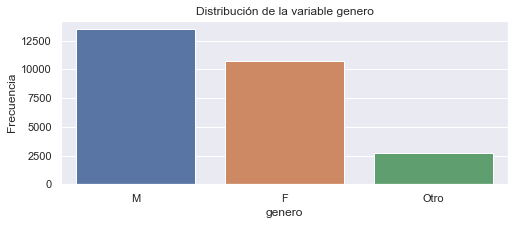

In [33]:
sns.countplot(data=df1, x='genero', order = df1['genero'].value_counts().index)
plt.title("Distribución de la variable genero")
plt.ylabel("Frecuencia")

### Distribución de la variable "establecimiento"

Se realiza un análisis de la variable "establecimiento" y se observa que del total de registros, el 37.5% de las transacciones se realizan en la categoría "otro" y esto se debe a que en la preparación de los datos para no perder muchos registros, los datos nulos o vacíos se clasificaron en esta categoría; el resto de transacciones se distribuyen de manera equitativa en el resto de establecimientos.

In [34]:
df1.establecimiento.value_counts()

Otro           10119
Restaurante     3454
Abarrotes       3415
Super           3402
MPago           3343
Farmacia        3242
Name: establecimiento, dtype: int64

In [35]:
df1.establecimiento.value_counts() / len(df1) * 100

Otro           37.512512
Restaurante    12.804449
Abarrotes      12.659870
Super          12.611677
MPago          12.392956
Farmacia       12.018536
Name: establecimiento, dtype: float64

Text(0, 0.5, 'Frecuencia')

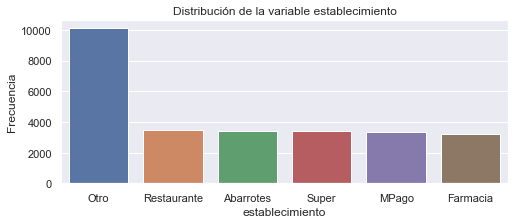

In [36]:
sns.countplot(data=df1, x='establecimiento', order = df1['establecimiento'].value_counts().index)
plt.title("Distribución de la variable establecimiento")
plt.ylabel("Frecuencia")

### Distribución de la variable "ciudad"

Se realiza un análisis de la variable "ciudad" y se observa que del total de registros, el 43.29% de las transacciones se realizan en la categoría "otro" y esto se debe a que en la preparación de los datos para no perder muchos registros, los datos nulos o vacíos se clasificaron en esta categoría; el resto de transacciones se distribuyen de manera equitativa en el resto de ciudades.

In [37]:
df1.ciudad.value_counts()

Otro           11678
Toluca          3997
Guadalajara     3833
Merida          3761
Monterrey       3706
Name: ciudad, dtype: int64

In [38]:
df1.ciudad.value_counts() / len(df1) * 100

Otro           43.291937
Toluca         14.817424
Guadalajara    14.209453
Merida         13.942539
Monterrey      13.738647
Name: ciudad, dtype: float64

Text(0, 0.5, 'Frecuencia')

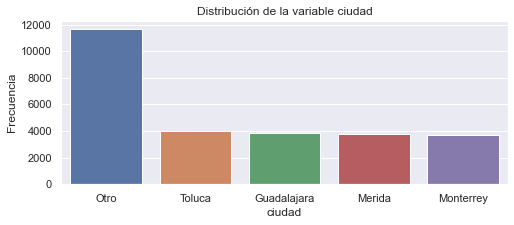

In [39]:
sns.countplot(data=df1, x='ciudad', order = df1['ciudad'].value_counts().index)
plt.title("Distribución de la variable ciudad")
plt.ylabel("Frecuencia")

### Distribución de la variable "tipo_tc"

Se realiza un análisis de la variable "tipo_tc" y se observa que del total de registros, el 70.07% de las transacciones se realizan de manera física.

In [40]:
df1.tipo_tc.value_counts()

Fisica     18903
Virtual     8072
Name: tipo_tc, dtype: int64

In [41]:
df1.tipo_tc.value_counts() / len(df1) * 100

Fisica     70.075996
Virtual    29.924004
Name: tipo_tc, dtype: float64

Text(0, 0.5, 'Frecuencia')

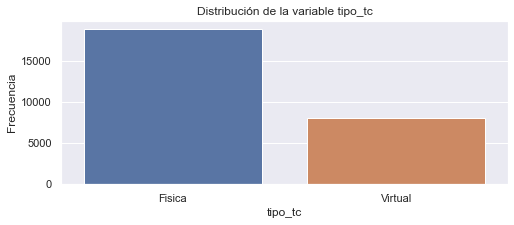

In [42]:
sns.countplot(data=df1, x='tipo_tc')
plt.title("Distribución de la variable tipo_tc")
plt.ylabel("Frecuencia")

### Distribución de la variable "status_txn"

Se realiza un análisis de la variable "status_txn" y se observa que del total de registros, el 69.85% de las transacciones se encuentran en estado aceptada.

In [43]:
df1.status_txn.value_counts()

Aceptada      18844
En proceso     5341
Rechazada      2790
Name: status_txn, dtype: int64

In [44]:
df1.status_txn.value_counts() / len(df1) * 100

Aceptada      69.857275
En proceso    19.799815
Rechazada     10.342910
Name: status_txn, dtype: float64

Text(0, 0.5, 'Frecuencia')

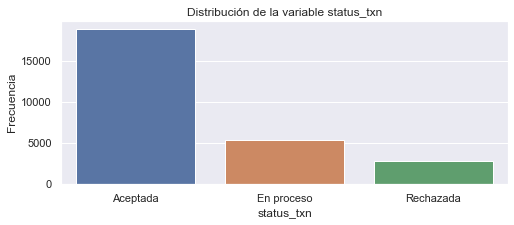

In [45]:
sns.countplot(data=df1, x='status_txn')
plt.title("Distribución de la variable status_txn")
plt.ylabel("Frecuencia")

### Distribución de la variable "is_prime"

Se realiza un análisis de la variable "is_prime" y se observa que del total de registros, el 86.05% de las transacciones no son realizadas por clientes prime.

In [46]:
df1.is_prime.value_counts()

False    23416
True      3559
Name: is_prime, dtype: int64

In [47]:
df1.is_prime.value_counts() / len(df1) * 100

False    86.806302
True     13.193698
Name: is_prime, dtype: float64

Text(0, 0.5, 'Frecuencia')

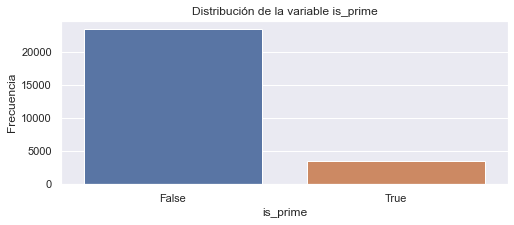

In [48]:
sns.countplot(data=df1, x='is_prime')
plt.title("Distribución de la variable is_prime")
plt.ylabel("Frecuencia")

### Distribución de la variable "fecha"

Se realiza un análisis de la variable "fecha" y se hacen uso de variables adicionales creadas previamente en Excel, estas variables son el día de la fecha y el día semana de la fecha, esto con la intención de analizar la distribución de las transacciones de manera más detallada. Los registros de transacciones se encuentran entre el 2 de Enero de 2020 y 30 de Enero de 2020. 

In [49]:
df1.fecha

0        21/01/2020
1        15/01/2020
2        17/01/2020
3         5/01/2020
4        30/01/2020
            ...    
26970     8/01/2020
26971    14/01/2020
26972    16/01/2020
26973    13/01/2020
26974     3/01/2020
Name: fecha, Length: 26975, dtype: object

#### Análisis por día del mes

Se observa que durante los días del mes la cantidad de transacciones presenta una distribución equitativa por día; esta distribución tiene su valor mínimo el 10 de Enero (869 transacciones, 3.22%) y su valor máximo el 29 de Enero (977 transacciones, 3,62%).

In [50]:
df1.dia_numero.value_counts().sort_index(ascending=True)

2     940
3     913
4     899
5     950
6     933
7     961
8     919
9     912
10    869
11    935
12    969
13    935
14    884
15    952
16    916
17    941
18    936
19    935
20    927
21    920
22    928
23    891
24    966
25    946
26    926
27    927
28    914
29    977
30    954
Name: dia_numero, dtype: int64

In [51]:
df1.dia_numero.value_counts().sort_index(ascending=True)/ len(df1) * 100

2     3.484708
3     3.384615
4     3.332715
5     3.521779
6     3.458758
7     3.562558
8     3.406858
9     3.380908
10    3.221501
11    3.466172
12    3.592215
13    3.466172
14    3.277108
15    3.529194
16    3.395737
17    3.488415
18    3.469880
19    3.466172
20    3.436515
21    3.410565
22    3.440222
23    3.303058
24    3.581094
25    3.506951
26    3.432808
27    3.436515
28    3.388323
29    3.621872
30    3.536608
Name: dia_numero, dtype: float64

En el siguiente grafico de barras no le logra observar de manera clara alguna tendencia de aumento o disminución de las tracciones por los días del mes.

Text(0, 0.5, 'Frecuencia')

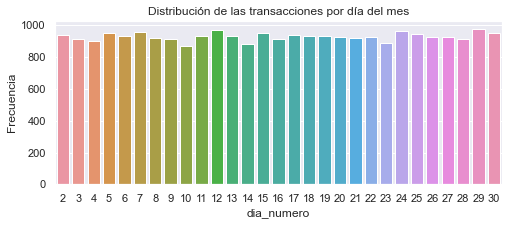

In [52]:
sns.countplot(data=df1, x='dia_numero')
plt.title("Distribución de las transacciones por día del mes")
plt.ylabel("Frecuencia")

#### Análisis por día de la semana

Se realiza un analisis por el dia de la semana donde se observa un aumento en las transacciones los días jueves respecto a los dem+as días de la semana. Del total de las transacciones realizadas en el mes, el 17.10% fueron realizadas el día jueves, seguido del día domingo con un 14.01%.

In [53]:
df1['dias_semana_orden'] = pd.Categorical(df1['dia_semana'], 
                                         categories = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo'], ordered = True)

In [54]:
df1.dias_semana_orden.value_counts().sort_index(ascending=True)

Lunes        3722
Martes       3679
Miércoles    3776
Jueves       4613
Viernes      3689
Sábado       3716
Domingo      3780
Name: dias_semana_orden, dtype: int64

In [55]:
df1.dias_semana_orden.value_counts().sort_index(ascending=True)/ len(df1) * 100

Lunes        13.797961
Martes       13.638554
Miércoles    13.998146
Jueves       17.101019
Viernes      13.675626
Sábado       13.775718
Domingo      14.012975
Name: dias_semana_orden, dtype: float64

In [56]:
df1.dias_semana_orden.value_counts()/ len(df1) * 100

Jueves       17.101019
Domingo      14.012975
Miércoles    13.998146
Lunes        13.797961
Sábado       13.775718
Viernes      13.675626
Martes       13.638554
Name: dias_semana_orden, dtype: float64

Text(0, 0.5, 'Frecuencia')

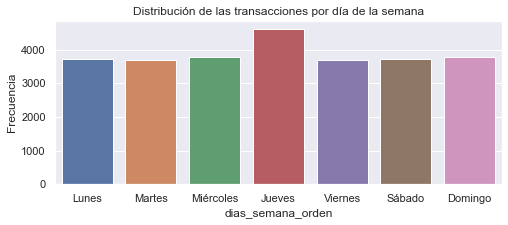

In [57]:
sns.countplot(data=df1, x='dias_semana_orden')
plt.title("Distribución de las transacciones por día de la semana")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Frecuencia')

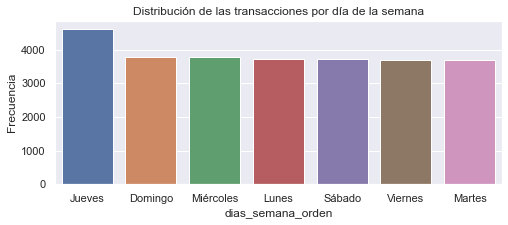

In [58]:
sns.countplot(data=df1, x='dias_semana_orden', order = df1['dias_semana_orden'].value_counts().index)
plt.title("Distribución de las transacciones por día de la semana")
plt.ylabel("Frecuencia")

### Distribución de la variable "hora"

Se realiza un análisis de la variable "hora" y se observa una distribución muy similar en la cantidad de transacciones por hora.

In [59]:
df1.hora.value_counts().sort_index(ascending=True)

1     1190
2     1162
3     1163
4     1176
5     1205
6     1202
7     1227
8     1146
9     1109
10    1202
11    1162
12    1137
13    1111
14    1170
15    1207
16    1187
17    1150
18    1208
19    1204
20    1118
21    1199
22    1211
23    1129
Name: hora, dtype: int64

In [60]:
df1.hora.value_counts().sort_index(ascending=True)/ len(df1) * 100

1     4.411492
2     4.307692
3     4.311399
4     4.359592
5     4.467099
6     4.455978
7     4.548656
8     4.248378
9     4.111214
10    4.455978
11    4.307692
12    4.215014
13    4.118628
14    4.337349
15    4.474513
16    4.400371
17    4.263207
18    4.478221
19    4.463392
20    4.144578
21    4.444856
22    4.489342
23    4.185357
Name: hora, dtype: float64

Text(0, 0.5, 'Frecuencia')

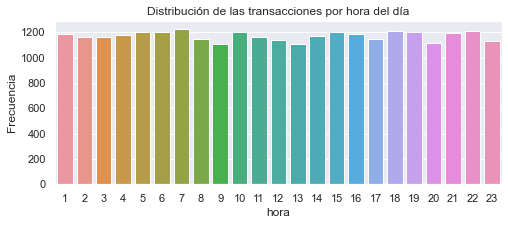

In [61]:
sns.countplot(data=df1, x='hora')
plt.title("Distribución de las transacciones por hora del día")
plt.ylabel("Frecuencia")

#### Creación variable 'Franjas_horarias'

Con la intención de conocer la distribución de las transacciones por franjas se construye la variables Franjas Horarias, y se observa hay mucha similitud en la distribución de las transacciones por las franjas, sin más alta en la franja nocturna(entre 6 pm y 11 pm).

In [62]:
#Definición de la variable Franjas Horarias
df1.loc[(df1['hora']<6),'Franjas_horarias']='Madrugada'
df1.loc[(df1['hora']>=6)&(df1['hora']<12),'Franjas_horarias']='Mañana'
df1.loc[(df1['hora']>=12)&(df1['hora']<18),'Franjas_horarias']='Tarde'
df1.loc[(df1['hora']>=18)&(df1['hora']<=23),'Franjas_horarias']='Noche'

In [63]:
df1.Franjas_horarias.value_counts()

Noche        7069
Mañana       7048
Tarde        6962
Madrugada    5896
Name: Franjas_horarias, dtype: int64

In [64]:
df1.Franjas_horarias.value_counts()/ len(df1) * 100

Noche        26.205746
Mañana       26.127896
Tarde        25.809082
Madrugada    21.857275
Name: Franjas_horarias, dtype: float64

Text(0, 0.5, 'Frecuencia')

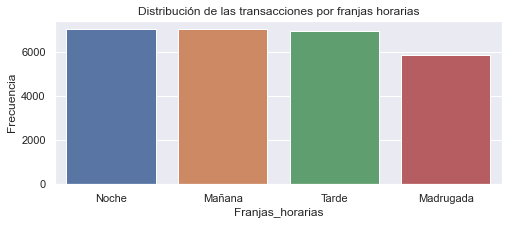

In [65]:
sns.countplot(data=df1, x='Franjas_horarias',order = df1['Franjas_horarias'].value_counts().index)
plt.title("Distribución de las transacciones por franjas horarias")
plt.ylabel("Frecuencia")

### 2.4.3 Análisis univariado variables numéricas

Se realiza un análisis inicial de estas variables calculando estadísticas descriptivos para conocer su comportamiento.

In [66]:
df1.select_dtypes(include='float64').columns

Index(['monto', 'linea_tc', 'interes_tc', 'dcto', 'cashback'], dtype='object')

In [67]:
(
    df1
        .select_dtypes(include='float64')
        .describe(include='all')
        .T
        .style.format(precision=2)
)

,count,mean,std,min,25%,50%,75%,max
monto,26975.00,499.07,289.31,0.02,246.52,500.50,749.60,999.92
linea_tc,26975.00,62476.81,21886.89,25000.00,44000.00,62000.00,82000.00,99000.00
interes_tc,26975.00,48.22,9.59,32.00,40.00,48.00,57.00,64.00
dcto,26975.00,17.47,34.33,0.00,0.00,0.00,18.77,199.36
cashback,26975.00,6.26,4.46,0.00,2.79,5.64,8.53,19.99


* Para la variable **monto** se observa que el monto promedio facturado de las transacciones es de 499, adicional se observa que más del 50% de las transacciones tienen un valor de 500(cuartil 2/mediana).
* Para la variable **linea_tc** se observa que el monto de linea(cupo de la tarjeta) promedio de las tarjetas con las que se realizaron las transacciones es de 62476, adicional se observa el 75% tienen un cupo inferior a 82000 (cuartil 3).
* Para la variable **dcto** se encuentra que un 69.7% de las transacciones con valor 0(18814 transacciones de un total de 26975).

En los gráficos box-plot e histogramas se corroboran los anteriores hallazgos.

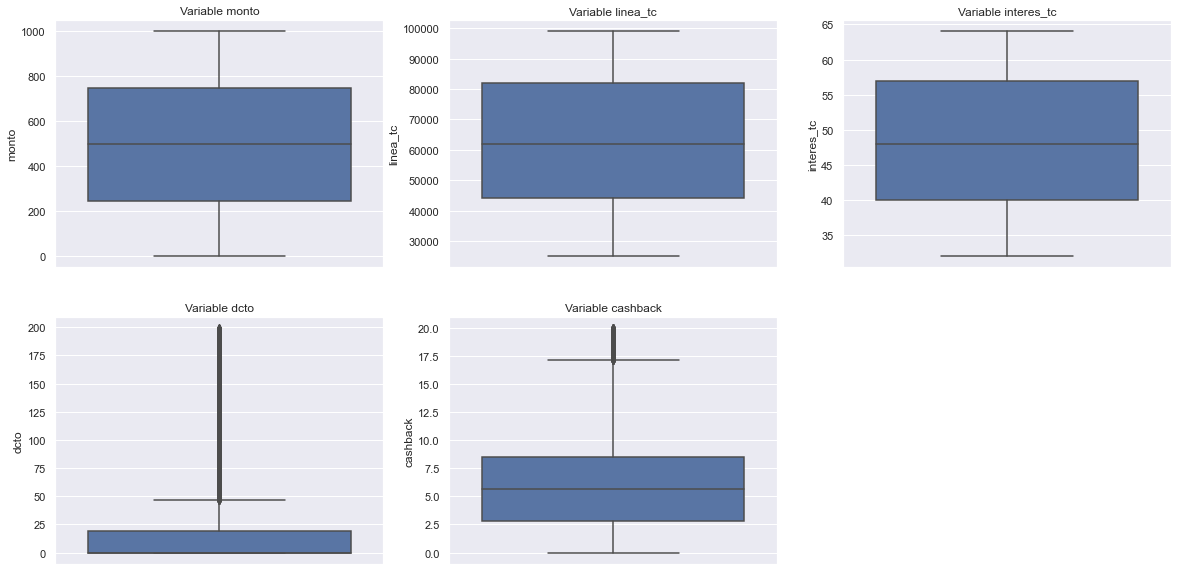

In [68]:
variables_numericas =  [*df1.select_dtypes(include='float64').columns]

plt.figure(figsize=(20, 10))
i=1
for col in variables_numericas:
    plt.subplot(2, 3, i)
    sns.boxplot(data=df1, y=col)
    plt.title(f"Variable {col}")
    i+=1

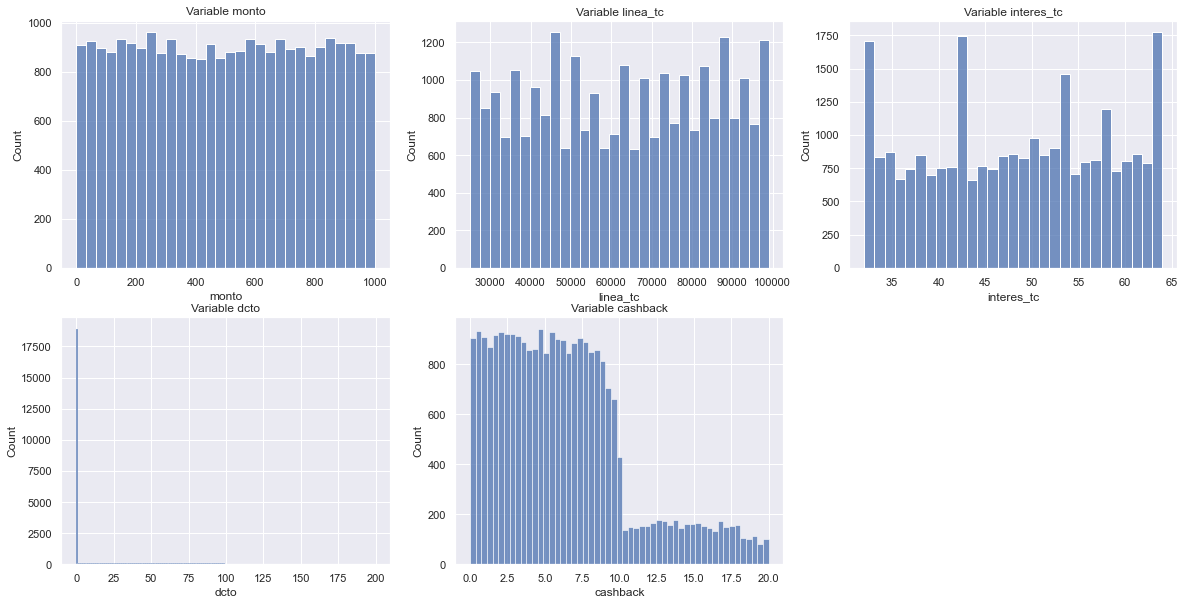

In [69]:
plt.figure(figsize=(20, 10))
i=1
for col in variables_numericas:
    plt.subplot(2, 3, i)
    sns.histplot(data=df1, x=col)
    plt.title(f"Variable {col}")
    i+=1

### 2.4.4 Análisis bivariado

En esta sección se realiza un análisis bivariado de la variable objetivo vs el resto de variables.

#### Variable Fraude vs Genero

Al analizar la variable Fraude vs Genero, se observa levemente un mayor número de casos de fraude en el género femenino, pero no es algo completamente concluyente.


<AxesSubplot:xlabel='genero'>

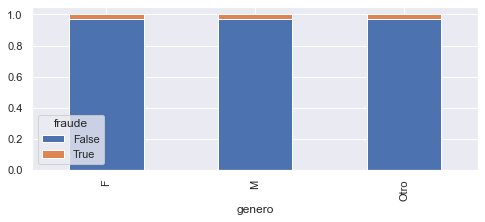

In [70]:
pd.crosstab(index=df1['genero'], columns=df1.fraude, margins=False, normalize='index').plot(kind='bar', stacked=True)

In [71]:
pd.crosstab(index=df1['genero'], columns=df1.fraude, margins=False, normalize='index')*100

fraude,False,True
genero,,
F,96.886071,3.113929
M,97.129965,2.870035
Otro,96.776557,3.223443


In [72]:
pd.crosstab(index=df1['genero'], columns=df1.fraude, margins=False)

fraude,False,True
genero,,
F,10392,334
M,13131,388
Otro,2642,88


#### Variable Fraude vs Ciudad

Al analizar la variable Fraude vs Ciudad, se observa levemente un menor numero de casos de fraude en la ciudad de Monterry, pero no es algo completamente concluyente.

<AxesSubplot:xlabel='ciudad'>

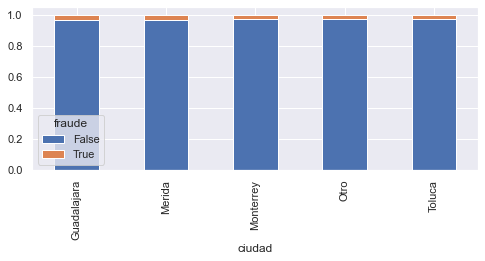

In [73]:
pd.crosstab(index=df1['ciudad'], columns=df1.fraude, margins=False, normalize='index').plot(kind='bar', stacked=True)

In [74]:
pd.crosstab(index=df1['ciudad'], columns=df1.fraude, margins=False, normalize='index')*100

fraude,False,True
ciudad,,
Guadalajara,96.921471,3.078529
Merida,96.809359,3.190641
Monterrey,97.301673,2.698327
Otro,96.968659,3.031341
Toluca,97.047786,2.952214


In [75]:
pd.crosstab(index=df1['ciudad'], columns=df1.fraude, margins=False)

fraude,False,True
ciudad,,
Guadalajara,3715,118
Merida,3641,120
Monterrey,3606,100
Otro,11324,354
Toluca,3879,118


#### Variable Fraude vs Establecimiento

Al analizar la variable Fraude vs Establecimiento, se observa una distribución de los casos de fraude muy similar en los distintos establecimientos, nada que sea muy concluyente.

<AxesSubplot:xlabel='establecimiento'>

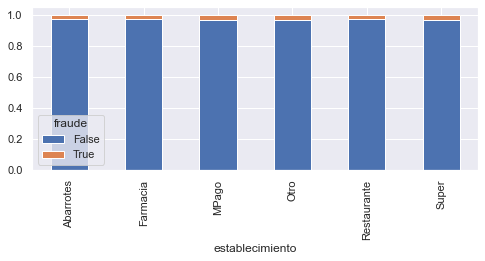

In [76]:
pd.crosstab(index=df1['establecimiento'], columns=df1.fraude, margins=False, normalize='index').plot(kind='bar', stacked=True)

In [77]:
pd.crosstab(index=df1['establecimiento'], columns=df1.fraude, margins=False, normalize='index')*100

fraude,False,True
establecimiento,,
Abarrotes,97.013177,2.986823
Farmacia,97.162246,2.837754
MPago,96.889022,3.110978
Otro,96.867279,3.132721
Restaurante,97.307470,2.692530
Super,97.001764,2.998236


In [78]:
pd.crosstab(index=df1['establecimiento'], columns=df1.fraude, margins=False)

fraude,False,True
establecimiento,,
Abarrotes,3313,102
Farmacia,3150,92
MPago,3239,104
Otro,9802,317
Restaurante,3361,93
Super,3300,102


#### Variable Fraude vs tipo_tc

Al analizar la variable Fraude vs tipo_tc, se observa levemente un mayor número de casos de fraude cuando el tipo de tarjeta es física.

<AxesSubplot:xlabel='tipo_tc'>

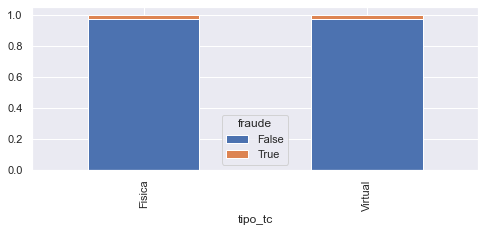

In [79]:
pd.crosstab(index=df1['tipo_tc'], columns=df1.fraude, margins=False, normalize='index').plot(kind='bar', stacked=True)

In [80]:
pd.crosstab(index=df1['tipo_tc'], columns=df1.fraude, margins=False, normalize='index')*100

fraude,False,True
tipo_tc,,
Fisica,96.936994,3.063006
Virtual,97.138256,2.861744


In [81]:
pd.crosstab(index=df1['tipo_tc'], columns=df1.fraude, margins=False)

fraude,False,True
tipo_tc,,
Fisica,18324,579
Virtual,7841,231


#### Variable Fraude vs is_prime

Al analizar la variable Fraude vs is_prime, se observa un mayor número de casos de fraude cuando el usuario no es prime, lo cual puede empezar a generar alertas.

<AxesSubplot:xlabel='is_prime'>

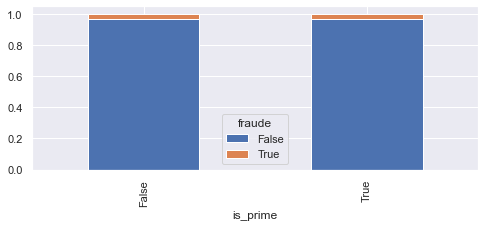

In [82]:
pd.crosstab(index=df1['is_prime'], columns=df1.fraude, margins=False, normalize='index').plot(kind='bar', stacked=True)

In [83]:
pd.crosstab(index=df1['is_prime'], columns=df1.fraude, margins=False, normalize='index')*100

fraude,False,True
is_prime,,
False,96.967885,3.032115
True,97.190222,2.809778


In [84]:
pd.crosstab(index=df1['is_prime'], columns=df1.fraude, margins=False)

fraude,False,True
is_prime,,
False,22706,710
True,3459,100


#### Variable Fraude vs dia_numero

Al analizar la variable Fraude vs dia calendario, se observa una distribución de los casos de fraude muy similar en los distintos días, nada que sea muy concluyente.

<AxesSubplot:xlabel='dia_numero'>

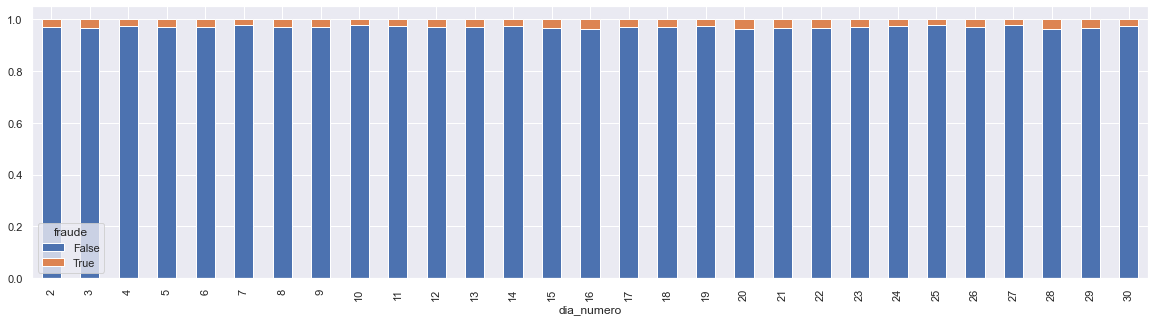

In [85]:
pd.crosstab(index=df1['dia_numero'], columns=df1.fraude, margins=False, normalize='index').plot(kind='bar', stacked=True, figsize=(20, 5))

In [86]:
pd.crosstab(index=df1['dia_numero'], columns=df1.fraude, margins=False, normalize='index')*100

fraude,False,True
dia_numero,,
2,97.021277,2.978723
3,96.604600,3.395400
4,97.330367,2.669633
5,96.842105,3.157895
6,96.891747,3.108253
7,97.710718,2.289282
8,97.062024,2.937976
9,96.929825,3.070175
10,97.928654,2.071346


In [87]:
pd.crosstab(index=df1['dia_numero'], columns=df1.fraude, margins=False)

fraude,False,True
dia_numero,,
2,912,28
3,882,31
4,875,24
5,920,30
6,904,29
7,939,22
8,892,27
9,884,28
10,851,18


#### Variable Fraude vs dias_semana

Al analizar la variable Fraude vs dias_semana, se observa levemente un mayor número de casos de fraude el día jueves.

<AxesSubplot:xlabel='dias_semana_orden'>

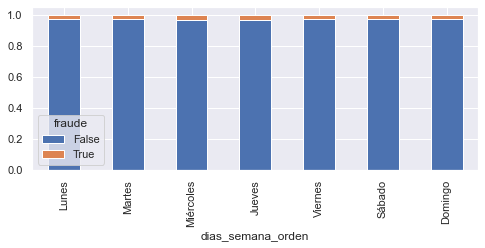

In [88]:
pd.crosstab(index=df1['dias_semana_orden'], columns=df1.fraude, margins=False, normalize='index').plot(kind='bar', stacked=True)

In [89]:
pd.crosstab(index=df1['dias_semana_orden'], columns=df1.fraude, margins=False, normalize='index')*100

fraude,False,True
dias_semana_orden,,
Lunes,96.963998,3.036002
Martes,97.010057,2.989943
Miércoles,96.716102,3.283898
Jueves,96.856709,3.143291
Viernes,97.235023,2.764977
Sábado,97.282024,2.717976
Domingo,96.957672,3.042328


In [90]:
pd.crosstab(index=df1['dias_semana_orden'], columns=df1.fraude, margins=False)

fraude,False,True
dias_semana_orden,,
Lunes,3609,113
Martes,3569,110
Miércoles,3652,124
Jueves,4468,145
Viernes,3587,102
Sábado,3615,101
Domingo,3665,115


#### Variable Fraude vs hora

Al analizar la variable Fraude vs hora, se observa una distribución de los casos de fraude muy similar en las distintos horas, nada que sea muy concluyente.

<AxesSubplot:xlabel='hora'>

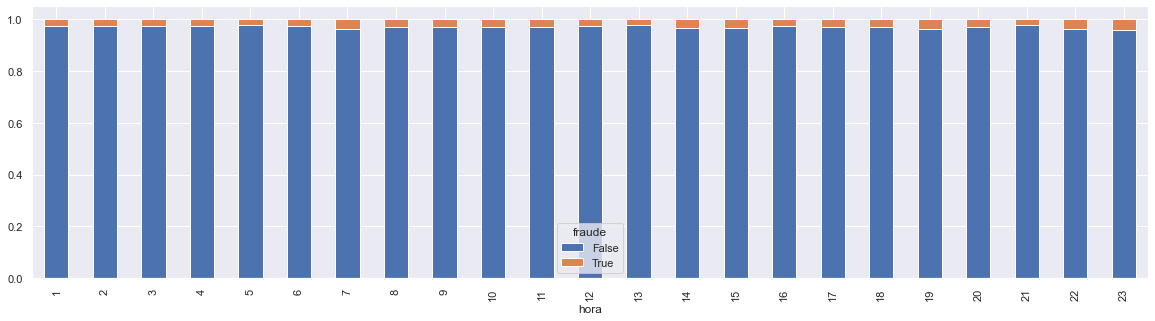

In [91]:
pd.crosstab(index=df1['hora'], columns=df1.fraude, margins=False, normalize='index').plot(kind='bar', stacked=True, figsize=(20, 5))

In [92]:
pd.crosstab(index=df1['hora'], columns=df1.fraude, margins=False, normalize='index')*100

fraude,False,True
hora,,
1,97.310924,2.689076
2,97.332186,2.667814
3,97.420464,2.579536
4,97.278912,2.721088
5,97.759336,2.240664
6,97.504160,2.495840
7,96.088020,3.911980
8,97.120419,2.879581
9,96.844004,3.155996


In [93]:
pd.crosstab(index=df1['hora'], columns=df1.fraude, margins=False)

fraude,False,True
hora,,
1,1158,32
2,1131,31
3,1133,30
4,1144,32
5,1178,27
6,1172,30
7,1179,48
8,1113,33
9,1074,35


#### Variable Fraude vs Franjas_horarias

Al analizar la variable Fraude vs Franjas_horarias, se observa un mayor número de casos de fraude en el horario de la noche lo cual puede generar alguna alerta.

<AxesSubplot:xlabel='Franjas_horarias'>

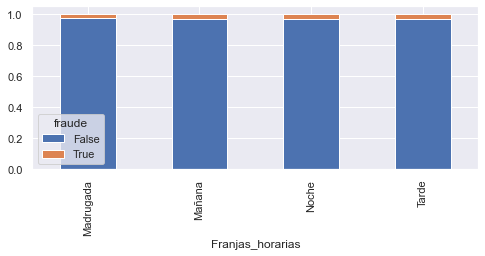

In [94]:
pd.crosstab(index=df1['Franjas_horarias'], columns=df1.fraude, margins=False, normalize='index').plot(kind='bar', stacked=True)

In [95]:
pd.crosstab(index=df1['Franjas_horarias'], columns=df1.fraude, margins=False, normalize='index')*100

fraude,False,True
Franjas_horarias,,
Madrugada,97.421981,2.578019
Mañana,96.892736,3.107264
Noche,96.703919,3.296081
Tarde,97.041080,2.958920


In [96]:
pd.crosstab(index=df1['Franjas_horarias'], columns=df1.fraude, margins=False)

fraude,False,True
Franjas_horarias,,
Madrugada,5744,152
Mañana,6829,219
Noche,6836,233
Tarde,6756,206


#### Variable Fraude vs Variables númericas

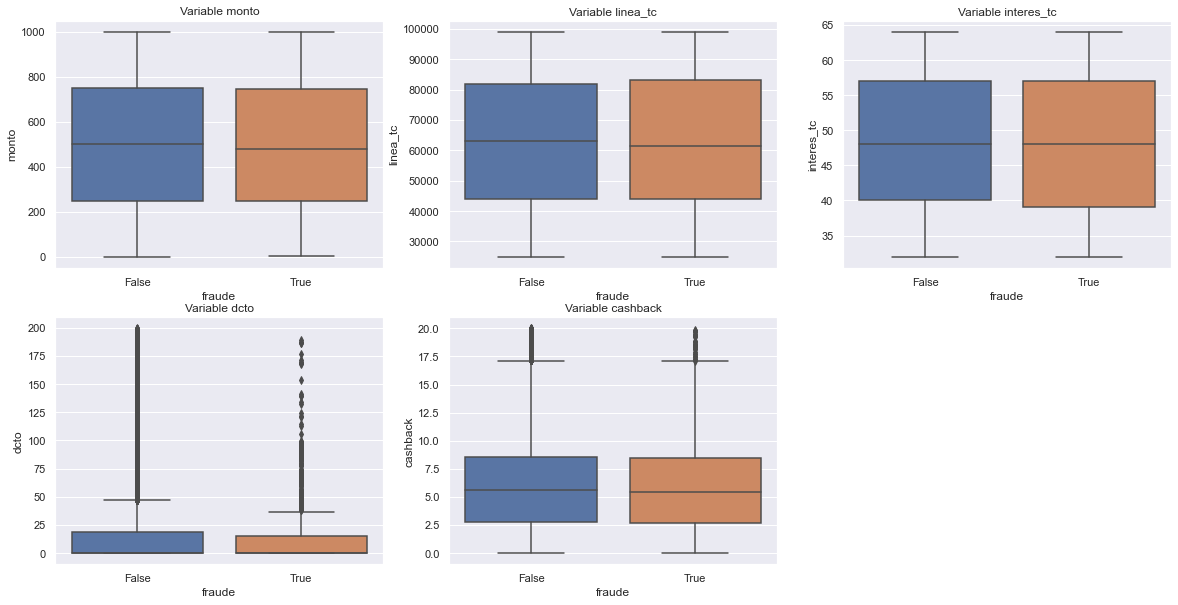

In [97]:
plt.figure(figsize=(20, 10))
i=1
for col in variables_numericas:
    plt.subplot(2, 3, i)
    sns.boxplot(data=df1, y=col, x='fraude')
    plt.title(f"Variable {col}")
    i+=1

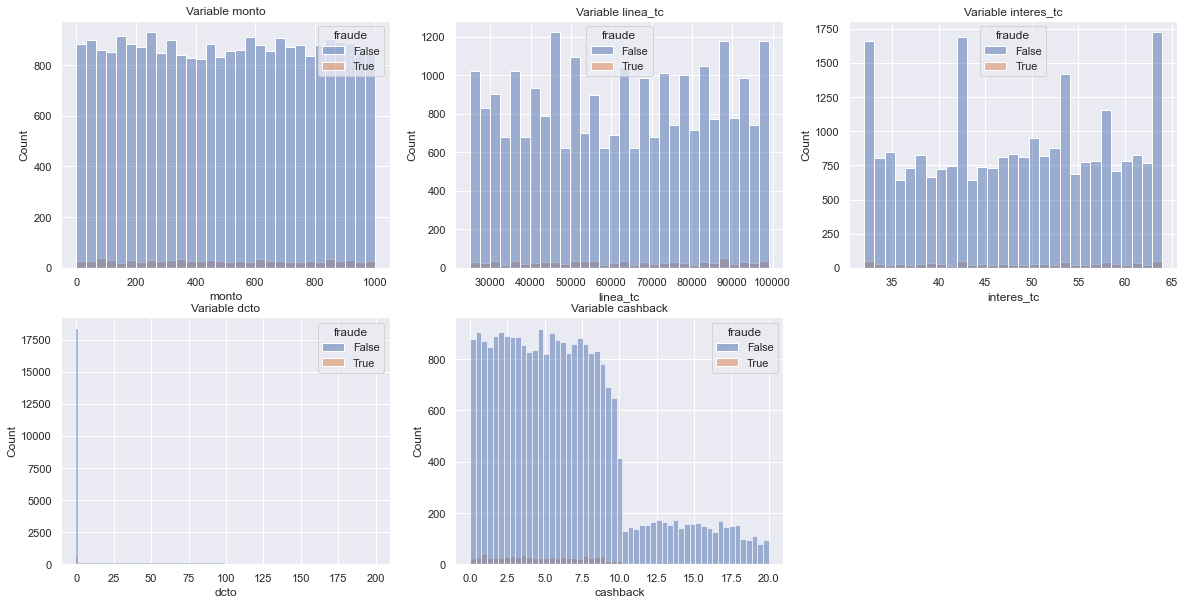

In [98]:
plt.figure(figsize=(20, 10))
i=1
for col in variables_numericas:
    plt.subplot(2, 3, i)
    sns.histplot(data=df1, x=col, hue='fraude')
    plt.title(f"Variable {col}")
    i+=1

### 2.4.5 Análisis multivariado

En esta sección se realiza un análisis multivariado entre las variables númericas. Se pueden observar algunas relaciones no muy fuertes, sin embargo hay una relación que tiende a ser fuerte entre **monto** y **cashback**.

In [99]:
df_num=df1.select_dtypes(include='float64').head()

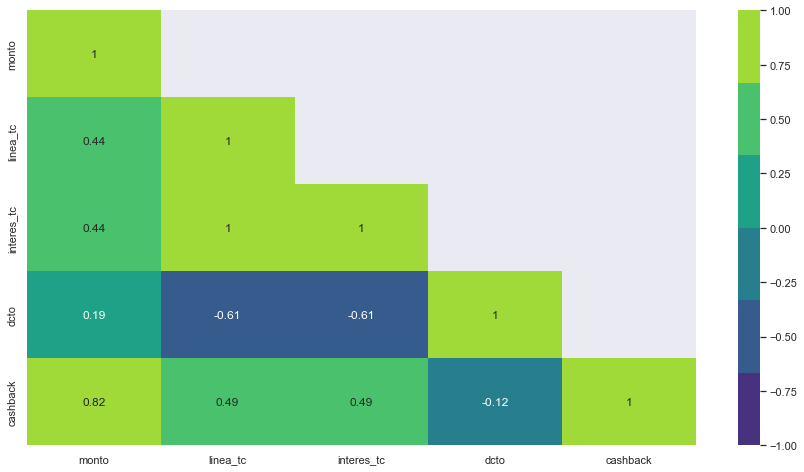

In [100]:
corr_df = df_num.corr()
lower_mat = np.triu(corr_df, k=1)

plt.figure(figsize=(15, 8))
sns.heatmap(#df_train_final[corr_mat_filtered].corr(method='spearman'), 
            df_num.corr(),
            annot=True, 
            vmin=-1, 
            vmax=1,
            #cmap=sns.diverging_palette(20, 220, n=200),
            #cmap=sns.diverging_palette(220, 20, as_cmap=True),
            #cmap=sns.color_palette('Blues'),
            cmap=sns.color_palette('viridis'),
            mask=lower_mat
           )
plt.show()

## 2.5 Train set y validation set

Se realiza la división entre train y validation, con tamaños de 70% y 30% respectivamente.

In [101]:
X = df1.drop(['ID_USER', 'fecha', 'dia_numero','hora', 'dispositivo', 'dias_semana_orden', 'fraude'], axis=1)
y=df1.fraude

In [102]:
X

,genero,monto,dia_semana,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,Franjas_horarias
0,F,608.345633,Martes,Super,Merida,Fisica,71000.0,51.0,Aceptada,False,60.834563,5.475111,Noche
1,F,88.719243,Miércoles,Otro,Merida,Virtual,71000.0,51.0,Aceptada,False,0.000000,1.774385,Mañana
2,F,790.037653,Viernes,Otro,Guadalajara,Virtual,94000.0,56.0,En proceso,False,0.000000,15.800753,Mañana
3,F,767.005387,Domingo,MPago,Guadalajara,Fisica,94000.0,56.0,Aceptada,False,0.000000,7.670054,Mañana
4,F,254.171053,Jueves,Otro,Guadalajara,Fisica,94000.0,56.0,Aceptada,False,0.000000,2.541711,Mañana
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,M,746.192089,Miércoles,Otro,Toluca,Fisica,40000.0,56.0,Aceptada,False,0.000000,7.461921,Tarde
26971,M,941.804966,Martes,Otro,Toluca,Fisica,40000.0,56.0,Aceptada,False,0.000000,9.418050,Tarde
26972,M,251.189885,Jueves,Otro,Toluca,Virtual,40000.0,56.0,Aceptada,False,0.000000,5.023798,Mañana
26973,M,24.182665,Lunes,Otro,Toluca,Fisica,40000.0,56.0,Aceptada,False,2.418266,0.217644,Tarde


#### Particionamiento de los datos

In [103]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, 
                                                                train_size=0.7, 
                                                                stratify=y, 
                                                                random_state=2022)

#### Distribución de la variable objetivo en training set

In [104]:
y_train.value_counts() / len(y_train) * 100

False    96.99714
True      3.00286
Name: fraude, dtype: float64

In [105]:
y_train.value_counts()

False    18315
True       567
Name: fraude, dtype: int64

####  Distribución de la variable objetivo en validation set

In [106]:
y_validation.value_counts() / len(y_validation) * 100

False    96.997405
True      3.002595
Name: fraude, dtype: float64

In [107]:
y_validation.value_counts()

False    7850
True      243
Name: fraude, dtype: int64

In [108]:
x_train

,genero,monto,dia_semana,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,Franjas_horarias
2704,M,385.057536,Martes,Restaurante,Monterrey,Fisica,61000.0,48.0,Aceptada,False,0.000000,3.850575,Tarde
20078,F,9.961190,Miércoles,Farmacia,Otro,Fisica,84000.0,59.0,En proceso,False,0.000000,0.099612,Tarde
9422,F,368.533154,Sábado,Otro,Merida,Fisica,64000.0,58.0,Aceptada,True,0.000000,3.685332,Tarde
5316,F,163.593027,Domingo,Super,Otro,Fisica,61000.0,54.0,Aceptada,False,0.000000,1.635930,Madrugada
14954,Otro,273.467527,Miércoles,Otro,Otro,Fisica,80000.0,58.0,Aceptada,False,0.000000,2.734675,Noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,M,346.653028,Miércoles,Otro,Monterrey,Fisica,96000.0,42.0,Aceptada,False,0.000000,3.466530,Madrugada
16405,M,447.322089,Lunes,Otro,Guadalajara,Virtual,45000.0,50.0,Rechazada,False,44.732209,8.051798,Tarde
17753,M,529.142241,Viernes,Otro,Monterrey,Virtual,87000.0,61.0,En proceso,False,105.828448,8.466276,Noche
15010,M,871.840790,Viernes,Otro,Merida,Fisica,75000.0,45.0,Aceptada,False,0.000000,8.718408,Tarde


####  Construcción de dataset finales

In [109]:
df_train = pd.concat([x_train, y_train.to_frame()], axis=1)

In [110]:
df_train.dtypes

genero               object
monto               float64
dia_semana           object
establecimiento      object
ciudad               object
tipo_tc              object
linea_tc            float64
interes_tc          float64
status_txn           object
is_prime             object
dcto                float64
cashback            float64
Franjas_horarias     object
fraude               object
dtype: object

In [110]:
cat_cols = [*df_train.select_dtypes(include='object').columns[:8]]

num_cols =  [*df_train.select_dtypes(exclude='object').columns]

In [111]:
num_cols

['monto', 'linea_tc', 'interes_tc', 'dcto', 'cashback']

##  2.6 Pipeline normalización y codificación

Se procede a construir el código de preprocesamiento de los datos, donde se realizará una estandarización de las variables numéricas y se dumificarán las variables categóricas.

In [112]:
# Transformacion variables numericas
transformacion_numericas = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# Transformacion variables categoricas

transformacion_categoricas = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")), ('ohe', OneHotEncoder(handle_unknown="ignore"))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", transformacion_numericas, num_cols),
        ("cat", transformacion_categoricas, cat_cols),
    ],
    remainder='passthrough'
)

## 3. Modelación y evaluación

In [113]:
metrica = 'roc_auc'

In [114]:
xtrain2=x_train.copy()

In [115]:
ytrain2=y_train.copy()

In [116]:
xtrain2.is_prime=xtrain2.is_prime*1
ytrain2=ytrain2*1
ytrain2=ytrain2.astype('int')

In [117]:
xvalid2=x_validation.copy()
yvalid2=y_validation.copy()

xvalid2.is_prime=xvalid2.is_prime*1
yvalid2=yvalid2*1
yvalid2=yvalid2.astype('int')

#### 3.1 Modelo LDA

In [118]:
steps = [("preprocessor", preprocessor), ('LDA', LinearDiscriminantAnalysis())]
pipeline = Pipeline(steps)
parametros ={'LDA__n_components':[None, 1]}
grid_LDA = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=metrica)
grid_LDA.fit(xtrain2, ytrain2)
print("score = %3.4f" %(grid_LDA.score(xvalid2,yvalid2)))
print(grid_LDA.best_params_)

score = 0.4892
{'LDA__n_components': None}


#### 3.2 Modelo LogisticRegression

In [120]:
steps = [("preprocessor", preprocessor), ("logistic", LogisticRegression())]
pipeline = Pipeline(steps)
parametros ={"logistic__C": np.logspace(0, 5, 12,16), "logistic__penalty": ["l1", "l2"]}
grid_LASSO = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=metrica)
grid_LASSO.fit(xtrain2, ytrain2)
print("score = %3.4f" %(grid_LASSO.score(xvalid2,yvalid2)))
print(grid_LASSO.best_params_)

score = 0.4891
{'logistic__C': 4328.761281083057, 'logistic__penalty': 'l2'}


C:\Users\CESCHAMO\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\CESCHAMO\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\CESCHAMO\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\CESCHAMO\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1094, in fit
    solver = _check_solver(self.solver, s

#### 3.3 Modelo SVM -SVM_linear, SVC(kernel="linear")

In [121]:
steps = [("preprocessor", preprocessor),("SVM_linear", SVC(kernel="linear"))]
pipeline = Pipeline(steps)
parametros = {'SVM_linear__C':[0.01,0.1,1,10]}
grid_SVM_1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=metrica)
grid_SVM_1.fit(xtrain2, ytrain2)
print("score = %3.4f" %(grid_SVM_1.score(xvalid2,yvalid2)))
print(grid_SVM_1.best_params_)

score = 0.5487
{'SVM_linear__C': 0.1}


#### 3.4 Modelo RNA

In [124]:
steps = [("preprocessor", preprocessor), ("MLP",MLPClassifier(max_iter=100))]
pipeline = Pipeline(steps) 
parametros = {'MLP__hidden_layer_sizes': [(110,),(122,)],
    'MLP__activation': ['logistic','relu'],
    'MLP__solver': ['sgd', 'adam'],
    'MLP__alpha': [0.00001,0.001],
    'MLP__learning_rate_init': [0.00001,0.001],
    'MLP__learning_rate': ['constant','adaptive']
}
grid_RNA = GridSearchCV(pipeline, param_grid=parametros, n_jobs=-1, cv=5, scoring=metrica)
grid_RNA.fit(xtrain2, ytrain2)
print("score = %3.4f" %(grid_RNA.score(xvalid2,yvalid2)))
print(grid_RNA.best_params_)

score = 0.4931
{'MLP__activation': 'logistic', 'MLP__alpha': 0.001, 'MLP__hidden_layer_sizes': (122,), 'MLP__learning_rate': 'adaptive', 'MLP__learning_rate_init': 1e-05, 'MLP__solver': 'sgd'}


C:\Users\CESCHAMO\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 3.5 Modelo LDA con SMOTE

In [125]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [126]:
steps = [("preprocessor", preprocessor), ('sampling', SMOTE()),('LDA', LinearDiscriminantAnalysis())]
pipeline = Pipeline(steps)
parametros ={'LDA__n_components':[None, 1]}
grid_LDA_SMOTE = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=metrica)
grid_LDA_SMOTE.fit(xtrain2, ytrain2)
print("score = %3.4f" %(grid_LDA_SMOTE.score(xvalid2,yvalid2)))
print(grid_LDA_SMOTE.best_params_)

score = 0.5109
{'LDA__n_components': None}


#### 3.6 Modelo LogisticRegression con SMOTE

In [127]:
steps = [("preprocessor", preprocessor), ('sampling', SMOTE()), ("logistic", LogisticRegression())]
pipeline = Pipeline(steps)
parametros ={"logistic__C": np.logspace(0, 5, 12,16), "logistic__penalty": ["l1", "l2"]}
grid_LASSO_SMOTE = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=metrica)
grid_LASSO_SMOTE.fit(xtrain2, ytrain2)
print("score = %3.4f" %(grid_LASSO_SMOTE.score(xvalid2,yvalid2)))
print(grid_LASSO_SMOTE.best_params_)

score = 0.5092
{'logistic__C': 35111.917342151275, 'logistic__penalty': 'l2'}


C:\Users\CESCHAMO\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\CESCHAMO\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\CESCHAMO\Anaconda3\lib\site-packages\imblearn\pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "C:\Users\CESCHAMO\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1094, in fit
    solver = _check_solver(self.solver,

#### 3.7 Modelo SVM -SVM_linear, SVC(kernel="linear") con SMOTE

In [128]:
steps = [("preprocessor", preprocessor),('sampling', SMOTE()),("SVM_linear", SVC(kernel="linear"))]
pipeline = Pipeline(steps)
parametros = {'SVM_linear__C':[0.01,0.1,1,10]}
grid_SVM_1_SMOTE = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=metrica)
grid_SVM_1_SMOTE.fit(xtrain2, ytrain2)
print("score = %3.4f" %(grid_SVM_1_SMOTE.score(xvalid2,yvalid2)))
print(grid_SVM_1_SMOTE.best_params_)

score = 0.5092
{'SVM_linear__C': 0.1}
